**Anomaly 1 (RTT)** introduced from  2024-03-15 14:00:00  to  2024-03-15 16:30:00  **anomaly count 31**  
**Anomaly 2 (Success Rate)** introduced from  2024-06-01 03:00:00  to  2024-06-03 12:00:00  **anomaly count  685**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

input_file_name = 'RTT_SR_with_anomalys.csv'
df = pd.read_csv(input_file_name, parse_dates=['Timestamp'], index_col='Timestamp')

print("Downloaded data for ML analysis:")
print(df.head())

Downloaded data for ML analysis:
                        RTT_ms  Success_Rate
Timestamp                                   
2024-01-01 00:00:00  51.646810     99.956094
2024-01-01 00:05:00  54.196656     99.929200
2024-01-01 00:10:00  45.646593     99.965009
2024-01-01 00:15:00  51.692967     99.968811
2024-01-01 00:20:00  48.967351     99.910979


**SUCCESS RATE MODEL**

In [2]:
scaler = MinMaxScaler()

df['Success_Rate_scaled'] = scaler.fit_transform(df[['Success_Rate']])
X_scaled = df[['Success_Rate_scaled']] 
print(X_scaled)

for c in [0.001, 0.002, 0.003, 0.004, 0.005,0.006, 0.0065,0.007]:
    model_sr_scaled = IsolationForest(contamination=c, random_state=42)
    model_sr_scaled.fit(X_scaled)
    flags = model_sr_scaled.predict(X_scaled)
    print(f"Contamination {c}: {np.sum(flags == -1)} anomalies")

                     Success_Rate_scaled
Timestamp                               
2024-01-01 00:00:00             0.928574
2024-01-01 00:05:00             0.884823
2024-01-01 00:10:00             0.943077
2024-01-01 00:15:00             0.949262
2024-01-01 00:20:00             0.855181
...                                  ...
2024-12-31 23:40:00             0.978232
2024-12-31 23:45:00             0.914238
2024-12-31 23:50:00             0.874920
2024-12-31 23:55:00             0.939248
2025-01-01 00:00:00             0.916581

[105409 rows x 1 columns]
Contamination 0.001: 49 anomalies
Contamination 0.002: 175 anomalies
Contamination 0.003: 238 anomalies
Contamination 0.004: 325 anomalies
Contamination 0.005: 458 anomalies
Contamination 0.006: 571 anomalies
Contamination 0.0065: 685 anomalies
Contamination 0.007: 736 anomalies


The value **contamination = 0.0065** yields exactly the expected number of anomalies. Now I’ll check whether the anomaly was detected in the correct location.

In [3]:
c = 0.0065
model_sr_scaled = IsolationForest(contamination=c, random_state=42)
model_sr_scaled.fit(X_scaled)
# Prediction
df['Anomaly_Score_SR_scaled'] = model_sr_scaled.decision_function(X_scaled)
df['Anomaly_Flag_SR_scaled'] = model_sr_scaled.predict(X_scaled)  # -1 = anomaly, 1 = normal

**PRINT SUMARY MODEL SUCCESS RATE**

In [4]:
print('wszystkich rekordów ',len(df['Anomaly_Score_SR_scaled']))
count_anomalies_scaled = (df['Anomaly_Flag_SR_scaled'] == -1).sum()
print("Number of detected anomalies (SR):", count_anomalies_scaled)
print(df['Anomaly_Flag_SR_scaled'].value_counts())

wszystkich rekordów  105409
Number of detected anomalies (SR): 685
Anomaly_Flag_SR_scaled
 1    104724
-1       685
Name: count, dtype: int64


In [5]:
print(df[df['Anomaly_Flag_SR_scaled']==-1])

                        RTT_ms  Success_Rate  Success_Rate_scaled  \
Timestamp                                                           
2024-06-01 03:00:00  32.482002     99.427437             0.068556   
2024-06-01 03:05:00  31.297303     99.480359             0.154649   
2024-06-01 03:10:00  32.686549     99.442075             0.092369   
2024-06-01 03:15:00  30.687033     99.479065             0.152544   
2024-06-01 03:20:00  25.702890     99.445784             0.098403   
...                        ...           ...                  ...   
2024-06-03 11:40:00  28.370388     99.458774             0.119535   
2024-06-03 11:45:00  30.430585     99.442758             0.093482   
2024-06-03 11:50:00  28.833855     99.442858             0.093643   
2024-06-03 11:55:00  32.033361     99.459933             0.121421   
2024-06-03 12:00:00  32.140048     99.432635             0.077013   

                     Anomaly_Score_SR_scaled  Anomaly_Flag_SR_scaled  
Timestamp                      

**Wynik się dokładnie pokrywa z anomalią**

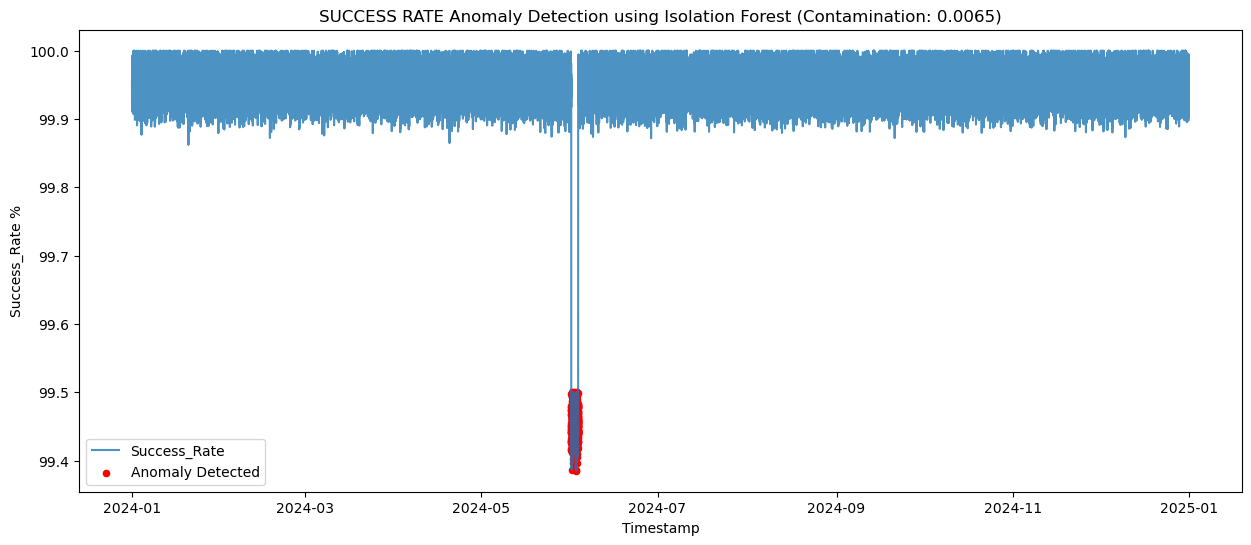

Number of detected anomalies: 685


In [6]:
# Visualization of Results

anomalies = df.loc[df['Anomaly_Flag_SR_scaled'] == -1]

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Success_Rate'], label='Success_Rate', alpha=0.8)

# Plotting anomalies
plt.scatter(anomalies.index, anomalies['Success_Rate'], 
            color='red', 
            label='Anomaly Detected', 
            s=20) 

plt.title(f'SUCCESS RATE Anomaly Detection using Isolation Forest (Contamination: {model_sr_scaled.contamination})')
plt.xlabel('Timestamp')
plt.ylabel('Success_Rate %')
plt.legend()
plt.show()

print("Number of detected anomalies:", len(anomalies))


In [7]:
scaler = MinMaxScaler()

df['RTT_ms_scaled'] = scaler.fit_transform(df[['RTT_ms']])
X_scaled = df[['RTT_ms_scaled']] 
print(X_scaled)

for c in [0.000444, 0.000445,0.000446, 0.00045]:
    model_rtt_scaled = IsolationForest(contamination=c, random_state=42)
    model_rtt_scaled.fit(X_scaled)
    flags = model_rtt_scaled.predict(X_scaled)
    print(f"Contamination {c}: {np.sum(flags == -1)} anomalies")

                     RTT_ms_scaled
Timestamp                         
2024-01-01 00:00:00       0.413559
2024-01-01 00:05:00       0.447633
2024-01-01 00:10:00       0.333377
2024-01-01 00:15:00       0.414176
2024-01-01 00:20:00       0.377753
...                            ...
2024-12-31 23:40:00       0.377855
2024-12-31 23:45:00       0.420047
2024-12-31 23:50:00       0.428226
2024-12-31 23:55:00       0.402167
2025-01-01 00:00:00       0.401361

[105409 rows x 1 columns]
Contamination 0.000444: 13 anomalies
Contamination 0.000445: 13 anomalies
Contamination 0.000446: 48 anomalies
Contamination 0.00045: 48 anomalies


In [8]:
c = 0.00045
c = 0.00044
model_rtt_scaled = IsolationForest(contamination=c, random_state=42)
model_rtt_scaled.fit(X_scaled)
# Prediction
df['Anomaly_Score_RTT_scaled'] = model_rtt_scaled.decision_function(X_scaled)
df['Anomaly_Flag_RTT_scaled'] = model_rtt_scaled.predict(X_scaled)  # -1 = anomaly, 1 = normal

In [9]:
print('all rows ',len(df['Anomaly_Score_RTT_scaled']))
count_anomalies_scaled = (df['Anomaly_Flag_RTT_scaled'] == -1).sum()
print("Number of detected anomalies (RTT):", count_anomalies_scaled)
print(df['Anomaly_Flag_RTT_scaled'].value_counts())

all rows  105409
Number of detected anomalies (RTT): 13
Anomaly_Flag_RTT_scaled
 1    105396
-1        13
Name: count, dtype: int64


In [10]:
print(df[df['Anomaly_Flag_RTT_scaled']==-1])

                        RTT_ms  Success_Rate  Success_Rate_scaled  \
Timestamp                                                           
2024-03-15 14:55:00  84.573264     99.948599             0.916381   
2024-03-15 15:00:00  87.513712     99.936794             0.897177   
2024-03-15 15:05:00  87.637026     99.929097             0.884655   
2024-03-15 15:10:00  93.882738     99.947171             0.914058   
2024-03-15 15:15:00  95.531550     99.980158             0.967721   
2024-03-15 15:20:00  95.027194     99.963709             0.940962   
2024-03-15 15:25:00  93.810044     99.953635             0.924574   
2024-03-15 15:30:00  92.438780     99.981770             0.970344   
2024-03-15 15:35:00  89.546937     99.977916             0.964073   
2024-03-15 15:40:00  90.668396     99.956682             0.929531   
2024-03-15 15:45:00  88.798665    100.000000             1.000000   
2024-03-15 15:55:00  83.665290     99.971961             0.954386   
2024-03-15 16:00:00  84.184776    

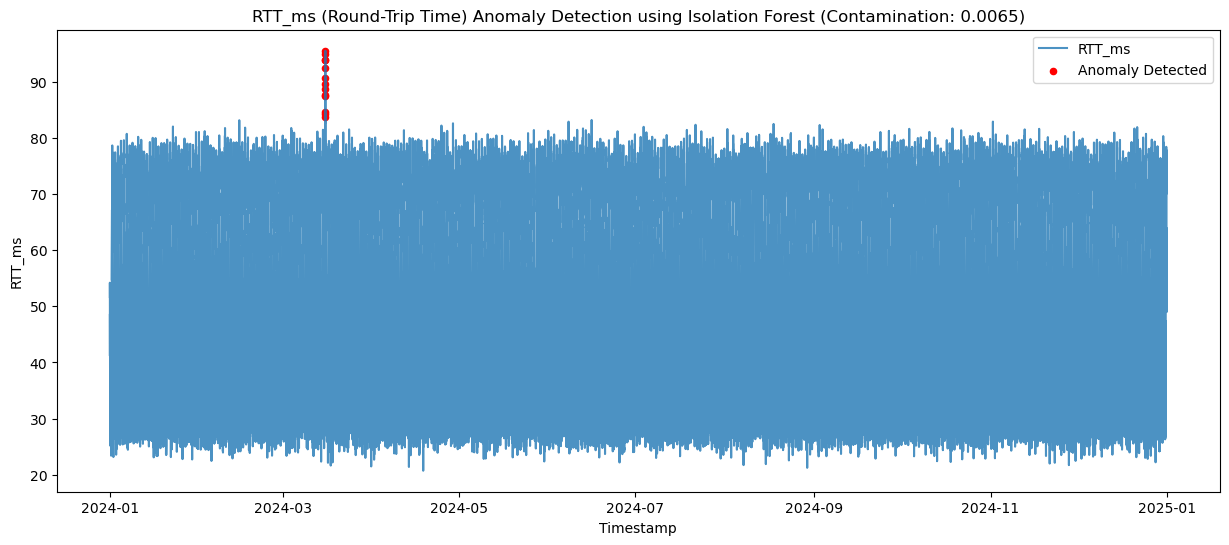

Number of detected anomalies: 13


In [11]:
# Visualization of Results
anomalies = df.loc[df['Anomaly_Flag_RTT_scaled'] == -1]

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['RTT_ms'], label='RTT_ms', alpha=0.8)

# Plotting anomalies
plt.scatter(anomalies.index, anomalies['RTT_ms'], 
            color='red', 
            label='Anomaly Detected', 
            s=20)

plt.title(f'RTT_ms (Round-Trip Time) Anomaly Detection using Isolation Forest (Contamination: {model_sr_scaled.contamination})')
plt.xlabel('Timestamp')
plt.ylabel('RTT_ms')
plt.legend()
plt.show()

print("Number of detected anomalies:", len(anomalies))